In [22]:
"""=============================================================================
Ex2: Correlation
    Cho dữ liệu baseball trong tập tin Master.csv.
    a) Đọc tập tin vào df => tạo hw từ df, chỉ lấy 2 cột height và weight. 
       Bỏ các dòng có dữ liệu null.
    b) Vẽ biểu đồ để xem xét tính tương quan.
    c) Vẽ boxplot để xác định và loại bỏ các outliers.
    d) Tính correlation của height và weight theo 2 cách Pearson và Spearsman và Kendall.
============================================================================="""
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sbn
import scipy.stats       as stats

In [4]:
#Correlation and Covariance are to measure the joint variability between variables (often between 2 variables)
#Covariance is dependent to the unit of the variables, therefore not used much
#However, the Correlation is independent from the unit, range from -1 to 1, therefore more significant in comparison of the joint variability

#There are many types of correlation: Pearson, Spearsman and Tau

#The Pearson method uses directly the original data to calculate the correlation coefficient, therefore always prioritize to use this method first1
#Conditions/assumptions of Pearson correlation: normality, two variables are independent from each other, no outliers,...

#In case the Pearson conditions are violated => Use Spearsman, which converts the data into ranks then use them to calculate correlation coefficient 

#In case there are many tie-rank values (many values have the same rank), use Kendal's Tau correlation

In [110]:
print('=======================================================================')
print('*** a) Đọc tập tin, chỉ lấy height và weight, loại bỏ dữ liệu null. ***')
print('=======================================================================')
data = pd.read_csv('data/Master.csv')

hw = data[['height','weight']].dropna() #subset hw containing 'height' and 'weight', and dropna()

heights = hw['height']
weights = hw['weight']

print(hw)

print(f'\nHeight and Weight info:')
hw.info()

*** a) Đọc tập tin, chỉ lấy height và weight, loại bỏ dữ liệu null. ***
       height  weight
0        75.0   220.0
1        72.0   180.0
2        75.0   190.0
3        75.0   190.0
4        73.0   184.0
...       ...     ...
18841    71.0   182.0
18842    72.0   173.0
18843    76.0   195.0
18844    66.0   160.0
18845    75.0   190.0

[17918 rows x 2 columns]

Height and Weight info:
<class 'pandas.core.frame.DataFrame'>
Index: 17918 entries, 0 to 18845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  17918 non-null  float64
 1   weight  17918 non-null  float64
dtypes: float64(2)
memory usage: 420.0 KB


*** b) Vẽ biểu đồ để xem xét tính tương quan.                       ***


<Figure size 800x800 with 0 Axes>

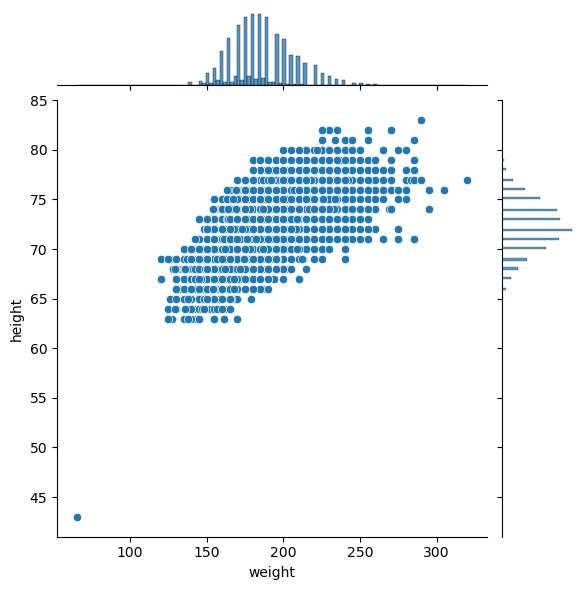

In [37]:
print('=======================================================================')
print('*** b) Vẽ biểu đồ để xem xét tính tương quan.                       ***')
print('=======================================================================')

plt.figure(figsize=(8,8))
sbn.jointplot(data=hw, x='weight', y='height')
plt.autoscale(enable=True)
plt.show()

*** c) Vẽ boxplot để xác định và loại bỏ các outliers.              ***


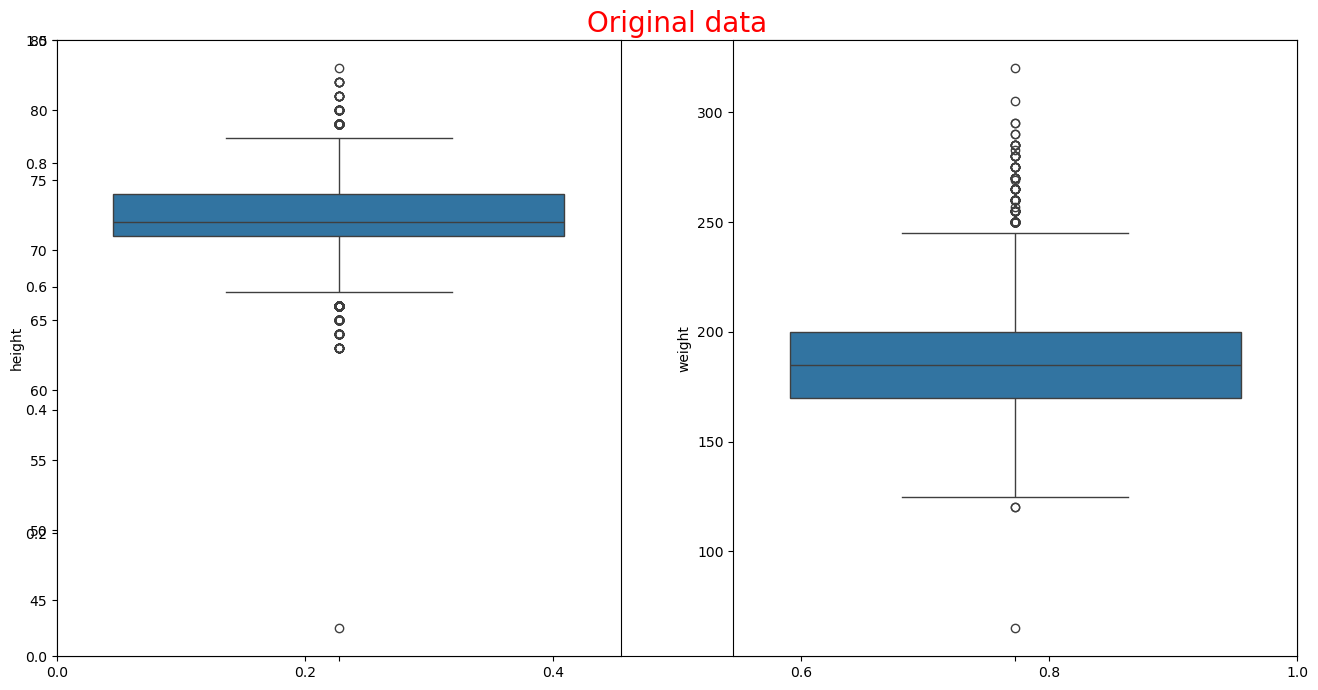


Percentile 25th of height = 71.0
Percentile 75th of height = 74.0
IQR of height = 3.0

Percentile 25th of weight = 170.0
Percentile 75th of weight = 200.0
IQR of weight = 30.0



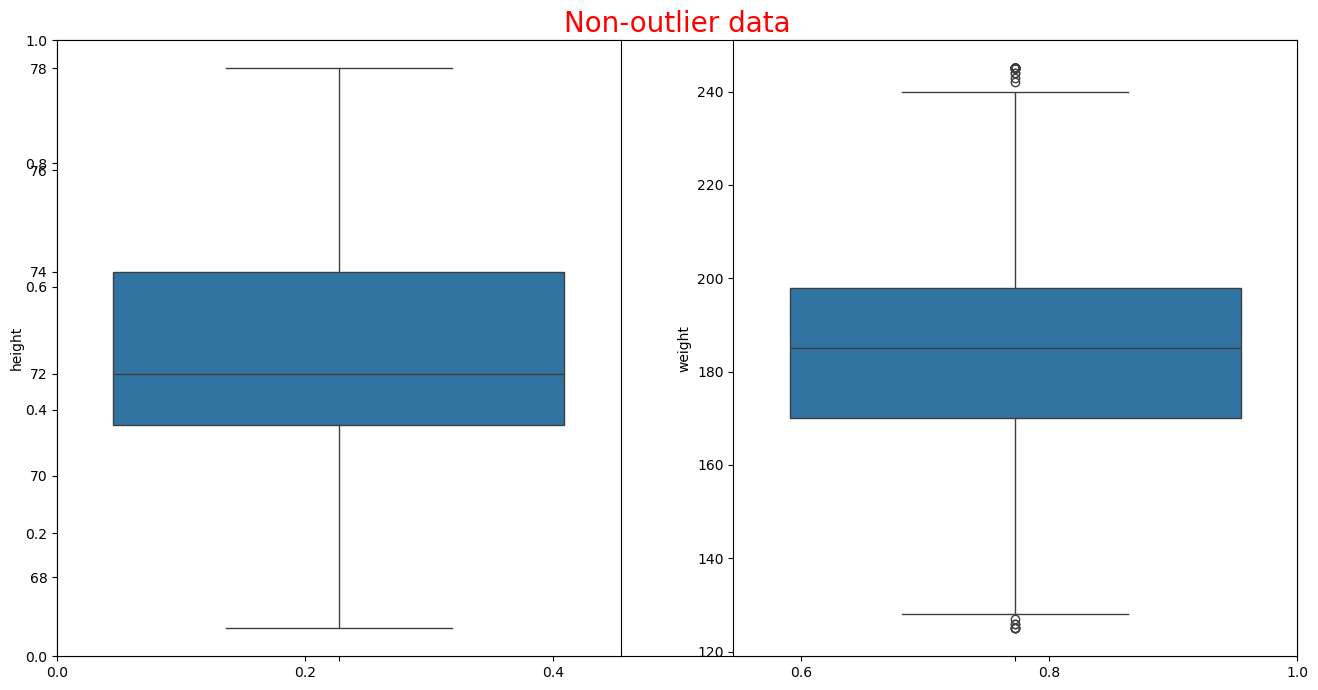

In [94]:
print('=======================================================================')
print('*** c) Vẽ boxplot để xác định và loại bỏ các outliers.              ***')
print('=======================================================================')

hw = data[['height','weight']].dropna()
#Draw boxplot
plt.figure(figsize=(16,8))
plt.title('Original data', color='red', size=20)

plt.subplot(1,2,1)
sbn.boxplot(data=hw,y='height')

plt.subplot(1,2,2)
sbn.boxplot(hw.weight)


plt.show()

#Calculate IQR
perc = [25, 75]

perc_height = np.percentile(hw.height, perc) #perc_height[0] will be percentile 25-th, and perc_height[1] will be percentile 75-th
iqr_height = stats.iqr(hw.height)
print(f'\nPercentile 25th of height = {perc_height[0]}')
print(f'Percentile 75th of height = {perc_height[1]}')
print(f'IQR of height = {iqr_height}')

perc_weight = np.percentile(hw.weight, perc) #perc_weight[0] will be percentile 25-th, and perc_weight[1] will be percentile 75-th
iqr_weight = stats.iqr(hw.weight)
print(f'\nPercentile 25th of weight = {perc_weight[0]}')
print(f'Percentile 75th of weight = {perc_weight[1]}')
print(f'IQR of weight = {iqr_weight}')

#Remove outliers
#Outliers are value that <= 25th percentile - IQR*1.5 
#                     or >= 75th percentile + IQR*1.5
heights_new = hw.height[(hw.height >= perc_height[0] - 1.5*iqr_height) & (hw.height <= perc_height[1] + 1.5*iqr_height)]
weights_new = hw.weight[(hw.weight >= perc_weight[0] - 1.5*iqr_weight) & (hw.weight <= perc_weight[1] + 1.5*iqr_weight)]
print()

#New boxplot with no outliers
plt.figure(figsize=(16,8))
plt.title('Non-outlier data', color='red', size=20)

plt.subplot(1,2,1)
sbn.boxplot(heights_new)

plt.subplot(1,2,2)
sbn.boxplot(weights_new)


plt.show()

In [108]:
print('==================================================================================')
print('*** d) Tính correlation (height, weight): Pearson và Spearsman và Kendall.     ***')
print('==================================================================================')

print('\nWeights ~ Heights Pearson correlation =', heights_new.corr(weights_new, method='pearson'))

print('\nWeights ~ Heights Spearman correlation =', heights_new.corr(weights_new, method='spearman'))

print('\nWeights ~ Heights Kendall correlation =', heights_new.corr(weights_new, method='kendall'))

*** d) Tính correlation (height, weight): Pearson và Spearsman và Kendall.     ***

Weights ~ Heights Pearson correlation = 0.6708146812914431

Weights ~ Heights Spearman correlation = 0.6766409118651429

Weights ~ Heights Kendall correlation = 0.5297513208397551
